In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

We are going to  build a classifer for sign languae using a data set from kaggle.

Download 2 files:


1.   sign_mnist_test.csv

2.   sign_mnist_train.csv



from 
[here](https://www.kaggle.com/datamunge/sign-language-mnist/home)


Kaggle link: https://www.kaggle.com/datamunge/sign-language-mnist/home



In [2]:
# Upload the downloaded files into your colab VM

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Copy both files from your gdrive to VM. This will enable faster training

!cp -r '/content/gdrive/My Drive/Colab Notebooks/sign_mnist_train.csv' '/tmp'

!cp -r '/content/gdrive/My Drive/Colab Notebooks/sign_mnist_test.csv' '/tmp'

In [4]:
# Load both files in pandas df

sign_mnist_train_df = pd.read_csv('/tmp/sign_mnist_train.csv')

sign_mnist_test_df = pd.read_csv('/tmp/sign_mnist_test.csv')

In [5]:
sign_mnist_train_df.shape

(27455, 785)

In [6]:
sign_mnist_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [7]:
sign_mnist_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [8]:
training_labels = sign_mnist_train_df['label']

In [9]:
training_labels.shape

(27455,)

In [10]:
training_labels.dtype

dtype('int64')

In [ ]:
sign_mnist_train_df.iloc[:,1:] # Select all rows but columns from pixel1 to pixel784

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,194,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,171,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,174,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [11]:
training_images_df = sign_mnist_train_df.iloc[:,1:]

In [12]:
training_images_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [13]:
for index, row in training_images_df.iterrows():
  print (row.shape)
  print(row)
  break

(784,)
pixel1      107
pixel2      118
pixel3      127
pixel4      134
pixel5      139
           ... 
pixel780    206
pixel781    206
pixel782    204
pixel783    203
pixel784    202
Name: 0, Length: 784, dtype: int64


In [14]:
temp_images = []

for index, row in training_images_df.iterrows():
  #print (row.shape)
  image_data_as_array = np.array_split(row, 28)
  temp_images.append(image_data_as_array)

training_images = np.array(temp_images).astype('float')

In [15]:
training_images.shape

(27455, 28, 28)

In [16]:
training_labels = np.array(training_labels).astype('float')

In [17]:
training_labels.shape

(27455,)

# DIY : Write a function called "get_images_labels" that takes  the above files (sign_mnist_test.csv & sign_mnist_train.csv) as input and returns 2 numpy arrays. The first array contains the  image pixels and the second array contains the image labels.

> Indented block



In [18]:
def get_images_labels(filename):
  df = pd.read_csv(filename)
  image_labels = df['label']
  image_labels = np.array(image_labels).astype('float')

  image_pixels_df = df.iloc[:,1:]

  temp_images = []

  for index, row in image_pixels_df.iterrows():
    #print (row.shape)
    image_data_as_array = np.array_split(row, 28)
    temp_images.append(image_data_as_array)

  image_pixels = np.array(temp_images).astype('float')

  return image_pixels,image_labels
  

In [19]:
testing_images, testing_labels = get_images_labels('/tmp/sign_mnist_test.csv')

In [20]:
training_images, training_labels = get_images_labels('/tmp/sign_mnist_train.csv')

In [21]:
print(testing_images.shape)
print(testing_labels.shape)

(7172, 28, 28)
(7172,)


In [22]:
print (training_images.shape)
print (training_labels.shape)

(27455, 28, 28)
(27455,)


In [23]:
# Since these are grey scale images we add another dimension to training and test images

training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

In [24]:
print (training_images.shape)
print (testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [25]:
# Create an ImageDataGenerator object which does Image Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
    )

# Create a validation data get without Augmentation

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
    

In [26]:
# Define the model
# Using 2 Conv layers, 2 MaxPooling and 1 Dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(26,activation='softmax')]
    )

# Compile Model. 
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch = len(training_images)/32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images)/32)

Epoch 1/15
858/857 [==============================] - 10s 12ms/step - loss: 2.5858 - accuracy: 0.1948 - val_loss: 1.5254 - val_accuracy: 0.5206
Epoch 2/15
858/857 [==============================] - 10s 12ms/step - loss: 1.4689 - accuracy: 0.5173 - val_loss: 0.8670 - val_accuracy: 0.7236
Epoch 3/15
858/857 [==============================] - 10s 12ms/step - loss: 1.0108 - accuracy: 0.6586 - val_loss: 0.5179 - val_accuracy: 0.7966
Epoch 4/15
858/857 [==============================] - 10s 12ms/step - loss: 0.7738 - accuracy: 0.7378 - val_loss: 0.3855 - val_accuracy: 0.8549
Epoch 5/15
858/857 [==============================] - 10s 12ms/step - loss: 0.6082 - accuracy: 0.7964 - val_loss: 0.2650 - val_accuracy: 0.9099
Epoch 6/15
858/857 [==============================] - 10s 11ms/step - loss: 0.5214 - accuracy: 0.8232 - val_loss: 0.2373 - val_accuracy: 0.9211
Epoch 7/15
858/857 [==============================] - 10s 11ms/step - loss: 0.4484 - accuracy: 0.8505 - val_loss: 0.1652 - val_accuracy:

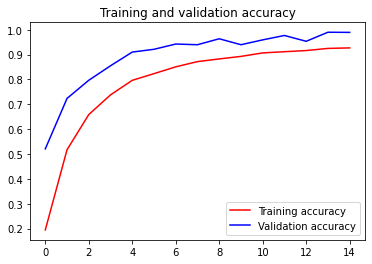

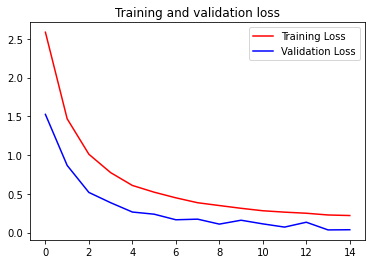

In [27]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The validation accuracy curve is consistently above the training accuracy curve.
Try training the model for more epochs.

